In [42]:
# video link
# https://drive.google.com/file/d/12St9wU0JN9i1V5nVp_2W2mktDGLz6aST/view?usp=sharing

import pandas as pd

import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import ast
import matplotlib.pyplot as plt
import seaborn as sns



# Loading  dataset
df = pd.read_csv('Airbnb_data - airbnb_data.csv')

# checking data and tables
print(df.shape)
print(df.columns)
df.head()


(74111, 29)
Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [43]:
#Summary of numerical features
df.describe()
txt = 'total records : {}'.format(df.shape[0])
print(txt)
# Checking missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


total records : 74111


host_response_rate        18299
review_scores_rating      16722
first_review              15864
last_review               15827
thumbnail_url              8216
neighbourhood              6872
zipcode                     968
bathrooms                   200
host_identity_verified      188
host_since                  188
host_has_profile_pic        188
beds                        131
bedrooms                     91
dtype: int64

In [44]:
# Filling missing review scores with mean (or median)
df['host_response_rate'].fillna(0, inplace=True)
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)
df['first_review'].fillna('05-10-2017', inplace=True)
df['last_review'].fillna('05-10-2017', inplace=True)
df['thumbnail_url'].fillna('NA', inplace=True)
df['neighbourhood'].fillna('NA', inplace=True)
df['zipcode'].fillna(0, inplace=True)
df['bathrooms'].fillna(0, inplace=True)
df['host_identity_verified'].fillna(False, inplace=True)
df['host_since'].fillna('05-10-2017', inplace=True)
df['host_has_profile_pic'].fillna(False, inplace=True)
df['beds'].fillna(0, inplace=True)
df['bedrooms'].fillna(0, inplace=True)

# Converting date columns to datetime
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce', dayfirst=True)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce', dayfirst=True)
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce', dayfirst=True)




C:\Users\vdm\AppData\Local\Temp\ipykernel_5960\276796994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_response_rate'].fillna(0, inplace=True)
C:\Users\vdm\AppData\Local\Temp\ipykernel_5960\276796994.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [45]:
# Check all values
df.describe()
txt = 'total records : {}'.format(df.shape[0])
print(txt)

# Checking missing values
missing2 = df.isnull().sum().sort_values(ascending=False)
missing2[missing2 > 0]

total records : 74111


Series([], dtype: int64)

In [46]:


# Drop rows with extremely high prices

# remove listings priced above 1000
# df = df[np.exp(df['log_price']) < 1000]  

df['price'] = np.exp(df['log_price'])


In [47]:


def countAmenities(amenStr):
    try:
        amenitiesList = ast.literal_eval(amenStr)
        return len(amenitiesList)
    except:
        return 0

df['num_amenities'] = df['amenities'].apply(countAmenities)


In [48]:
df['host_experience_days'] = (pd.to_datetime('today') - df['host_since']).dt.days
df['host_experience_days'].fillna(df['host_experience_days'].median())


0        4790
1        2879
2        3116
3        3671
4        3720
         ... 
74106    4427
74107    3291
74108    4871
74109    2789
74110    4545
Name: host_experience_days, Length: 74111, dtype: int64

In [49]:
df['days_since_last_review'] = (pd.to_datetime('today') - df['last_review']).dt.days
df['days_since_last_review'].fillna(df['days_since_last_review'].median())


0        3215
1        2783
2        2792
3        2771
4        3027
         ... 
74106    2771
74107    2944
74108    2796
74109    2771
74110    2929
Name: days_since_last_review, Length: 74111, dtype: int64

In [50]:
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [51]:
drop_cols = ['id', 'log_price', 'description', 'name', 'thumbnail_url', 'amenities',
             'host_response_rate', 'zipcode', 'host_has_profile_pic', 'host_identity_verified']
df.drop(columns=drop_cols, inplace=True)


In [52]:
# checking values in error causing object columns
print(df['instant_bookable'].unique())
print(df['neighbourhood'].unique())


# mapping data to correct input type
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})
df['neighbourhood'] = df['neighbourhood'].replace('NA', np.nan)


# From large list of neighbourhood, keeping only large neighbourhood
topNeighbourhood = df['neighbourhood'].value_counts().nlargest(20).index
df['neighbourhood'] = df['neighbourhood'].apply(lambda x: x if x in topNeighbourhood else 'Other')

df = pd.get_dummies(df, columns=['neighbourhood'], drop_first=True)


# removing outliers for better results
df = df[df['price'] < df['price'].quantile(0.99)]

df['host_days_active'] = (df['last_review'] - df['host_since']).dt.days.clip(lower=0)
df['listing_age'] = (df['last_review'] - df['first_review']).dt.days.clip(lower=0)
df.drop(columns=['first_review', 'last_review', 'host_since'], inplace=True)


['f' 't']
['Brooklyn Heights' "Hell's Kitchen" 'Harlem' 'Lower Haight'
 'Columbia Heights' 'Noe Valley' 'NA' 'Downtown' 'Richmond District'
 'Alphabet City' 'Hermosa Beach' 'Torrance' 'U Street Corridor'
 'Humboldt Park' 'Wicker Park' 'South Boston' 'Lower East Side' 'Flatbush'
 'Sherman Oaks' 'East Flatbush' 'Valley Glen' 'Dupont Circle' 'Jamaica'
 'Forest Hills' 'Murray Hill' 'Lefferts Garden' 'Mid-Wilshire' 'Venice'
 'West Hollywood' 'Brownsville' 'Williamsburg' 'East Village'
 'South Loop/Printers Row' 'Westlake' 'Hollywood Hills' 'Upper East Side'
 'Bushwick' 'Bedford-Stuyvesant' 'Pilsen' 'Chelsea' 'Sunnyside'
 'Greenwich Village' 'Washington Heights' 'Pasadena' 'Potrero Hill'
 'Brookland' 'Los Feliz' 'Hollywood' 'Midtown East' 'Glendale'
 'Park Slope' 'Arcadia' 'West Village' 'Astoria' 'Portola' 'Burbank'
 'East Harlem' 'Silver Lake' 'Hillbrook' 'Shaw' 'Hillcrest'
 'Morningside Heights' 'Tribeca' 'Studio City' 'Western Addition/NOPA'
 'Echo Park' 'Financial District' 'Lakeview' '

In [53]:

X = df.drop(columns=['price'])

# trying to curb outliers affects in price 
y = df['price']
# y = np.log1p(df['price']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# dropping datetime columns as it can not handle this as they expect numerical values only
X_train = X_train.drop(columns=X_train.select_dtypes(include=['datetime']).columns)
X_test = X_test.drop(columns=X_test.select_dtypes(include=['datetime']).columns)


In [54]:
# print(X_train.dtypes)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 73369 entries, 0 to 74110
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   accommodates                         73369 non-null  int64  
 1   bathrooms                            73369 non-null  float64
 2   cleaning_fee                         73369 non-null  bool   
 3   instant_bookable                     73369 non-null  bool   
 4   latitude                             73369 non-null  float64
 5   longitude                            73369 non-null  float64
 6   number_of_reviews                    73369 non-null  int64  
 7   review_scores_rating                 73369 non-null  float64
 8   bedrooms                             73369 non-null  float64
 9   beds                                 73369 non-null  float64
 10  price                                73369 non-null  float64
 11  num_amenities                    

In [55]:
# checking for non numeric types in X, so we can remove objects and other types which model won't handle, empty is target
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


In [56]:


def evaluateModel(model, X_test, y_test):
    pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    mae = mean_absolute_error(y_test, pred)
    
    r2 = r2_score(y_test, pred)

    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    
    return pred


In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Linear Regression Results:")
lr_preds = evaluateModel(lr, X_test, y_test)


Linear Regression Results:
RMSE: 89.76
MAE: 55.67
R²: 0.4847


In [58]:
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# print("Random Forest Results:")
# rf_preds = evaluate_model(rf, X_test, y_test)


# new approach for better results - removing low importance features for better accuracy in predictions


# training model first
rf = RandomForestRegressor(n_estimators=100, random_state=51)
rf.fit(X_train, y_train)

# Get all feature of importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

#Filter important features, drop lower importance features
threshold = 0.005
importantFeatures = importances[importances > threshold].index.tolist()
print(f"Keeping {len(importantFeatures)} out of {len(importances)} features")

# new reduced feature set
X_train_r = X_train[importantFeatures]
X_test_r = X_test[importantFeatures]

# retraining on reduced feature set
rf_reduced = RandomForestRegressor(n_estimators=100, random_state=51)
rf_reduced.fit(X_train_r, y_train)

# evaluating reduced features randomForest
print("Random Forest Results - With Reduced Features:")
rf_preds = evaluateModel(rf_reduced, X_test_r, y_test)



Keeping 19 out of 84 features
Random Forest Results - With Reduced Features:
RMSE: 81.23
MAE: 46.48
R²: 0.5780


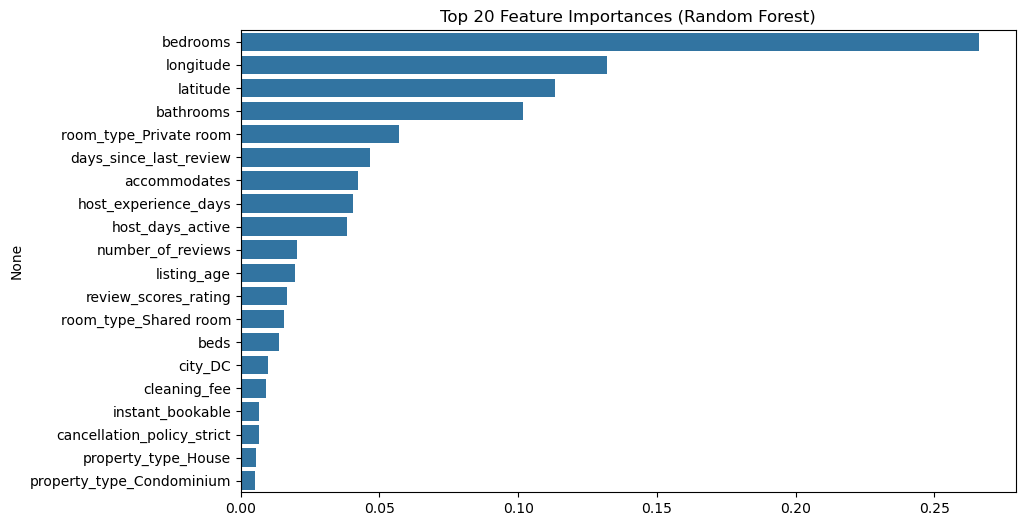

In [59]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
topFeatures = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=topFeatures.values, y=topFeatures.index)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

In [60]:
results = {
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, lr_preds)),
        np.sqrt(mean_squared_error(y_test, rf_preds))
    ],
    "MAE": [
        mean_absolute_error(y_test, lr_preds),
        mean_absolute_error(y_test, rf_preds)
    ],
    "R²": [
        r2_score(y_test, lr_preds),
        r2_score(y_test, rf_preds)
    ]
}

pd.DataFrame(results)


,Model,RMSE,MAE,R²
0,Linear Regression,89.762037,55.671493,0.484669
1,Random Forest,81.231908,46.475573,0.577959


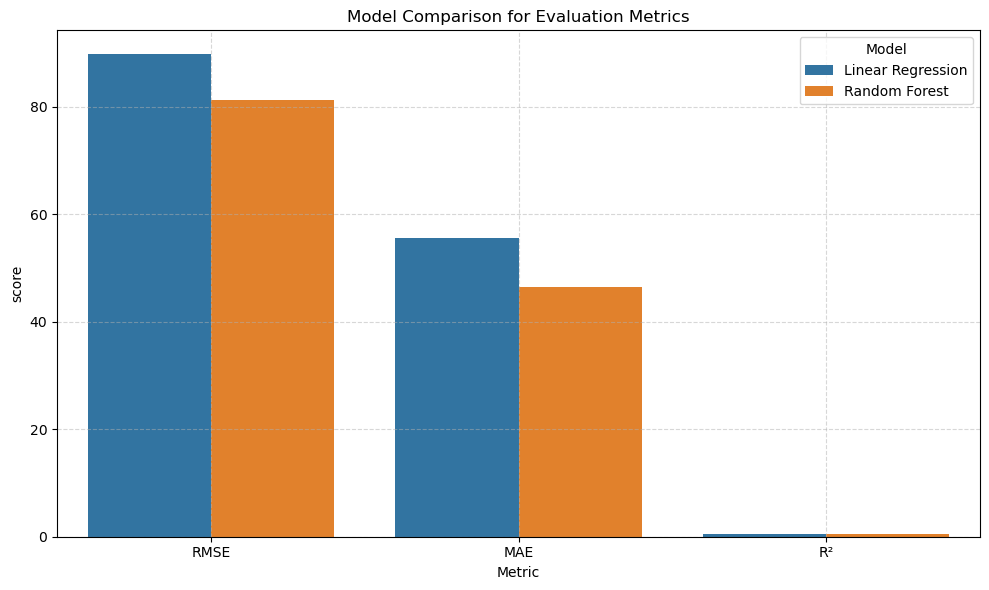

In [61]:


#Setting up the data
metrics_df = pd.DataFrame(results)

# using Melt,for easier plotting
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# graph
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x="Metric", y="Value", hue="Model")

plt.title("Model Comparison for Evaluation Metrics")
plt.ylabel("score")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


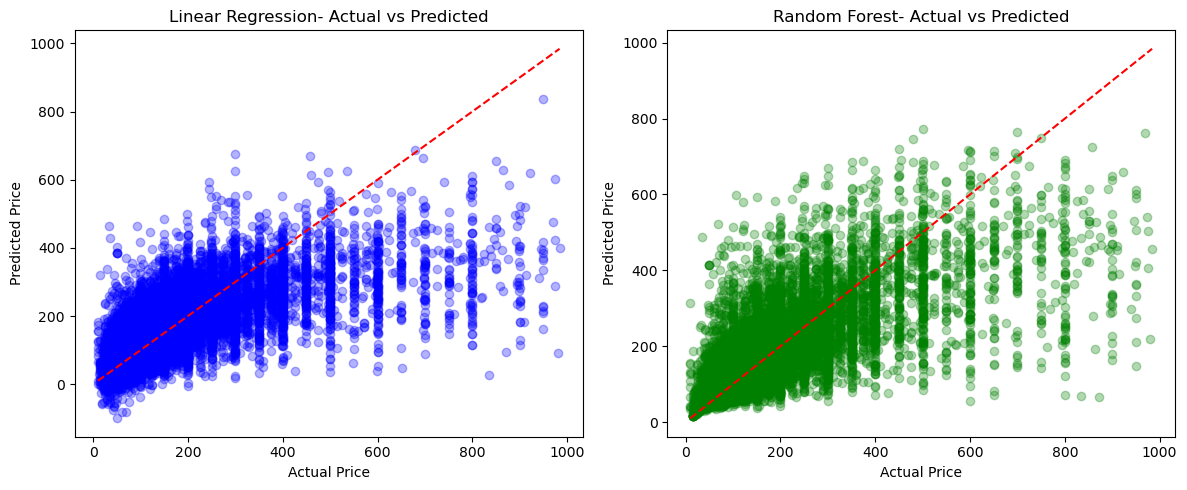

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Linear-Regression - fig-axis-0
axs[0].scatter(y_test, lr_preds, alpha=0.3, color='blue')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

axs[0].set_title("Linear Regression- Actual vs Predicted")
axs[0].set_xlabel("Actual Price")
axs[0].set_ylabel("Predicted Price")

# Random-Forest - fig-axis-1
axs[1].scatter(y_test, rf_preds, alpha=0.3, color='green')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

axs[1].set_title("Random Forest- Actual vs Predicted")
axs[1].set_xlabel("Actual Price")
axs[1].set_ylabel("Predicted Price")

plt.tight_layout()
plt.show()


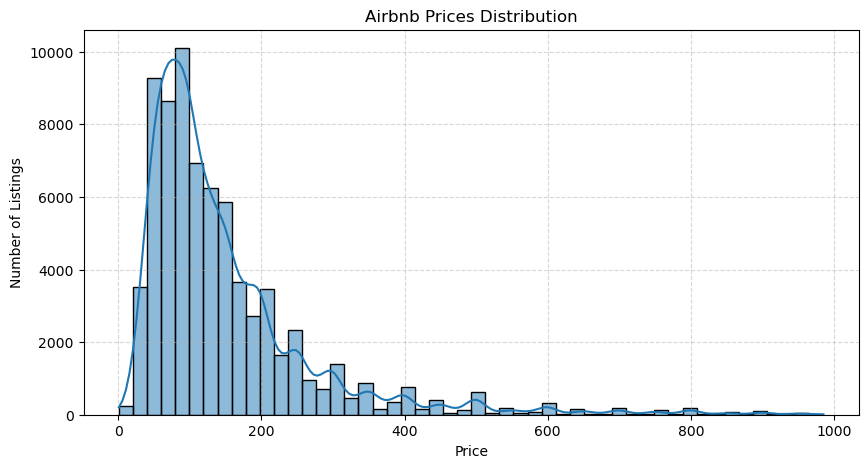

In [63]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Airbnb Prices Distribution")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


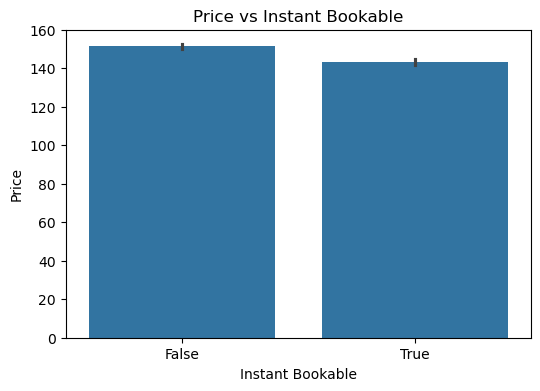

In [64]:
plt.figure(figsize=(6, 4))
sns.barplot(x='instant_bookable', y='price', data=df)


plt.title("Price vs Instant Bookable")
plt.xlabel("Instant Bookable")

plt.ylabel("Price")
plt.show()


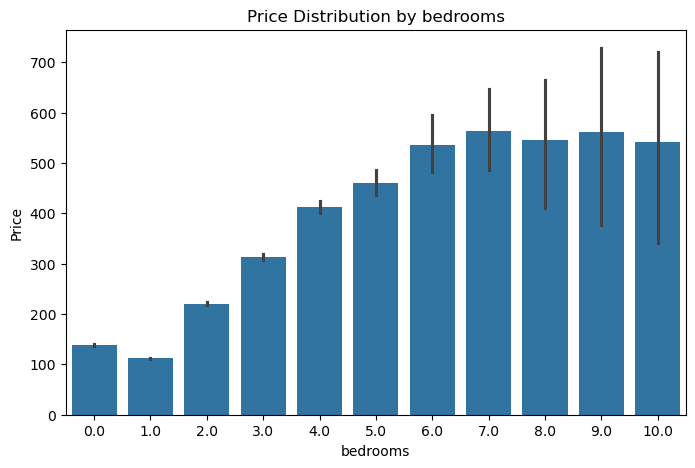

In [65]:

plt.figure(figsize=(8, 5))
sns.barplot(x='bedrooms', y='price', data=df)

plt.title("Price Distribution by bedrooms")
plt.xlabel("bedrooms")
plt.ylabel("Price")

plt.show()

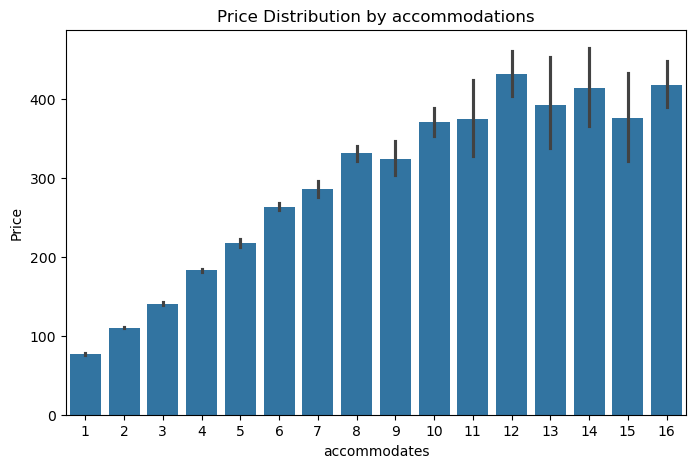

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x='accommodates', y='price', data=df)

plt.title("Price Distribution by accommodations")
plt.xlabel("accommodates")
plt.ylabel("Price")

plt.show()

In [67]:
# For predicting new listings

new_listing_parameters = {
    'bedrooms': 4,
    'beds': 4,
    'bathrooms': 0  
}

new2_df = pd.DataFrame([new_listing_parameters])

# Matching rest of the columns with training set
for col in X_train.columns:
    if col not in new2_df.columns:
        new2_df[col] = 0  # Addin missing columns
new2_df = new2_df[X_train.columns]  #reordering columns


predicted_price = rf.predict(new2_df)[0]
print(f"Predicted price for the new listing: ${predicted_price:.2f}")


Predicted price for the new listing: $217.89


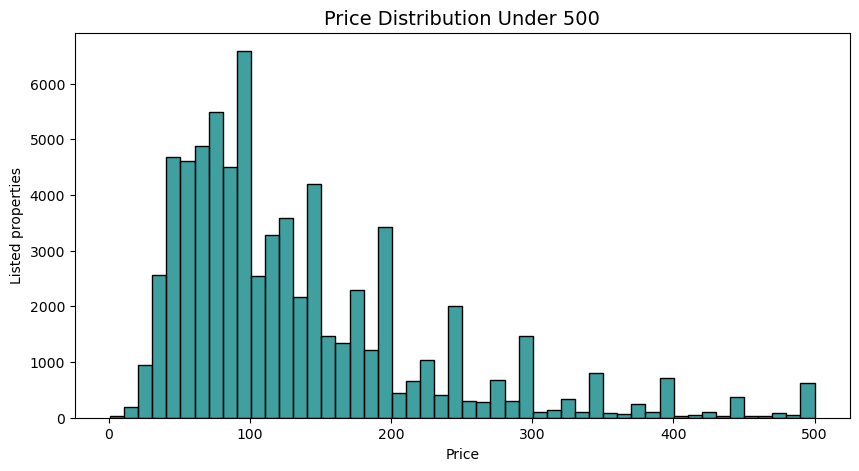

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['price'] < 500]['price'], bins=50, color='teal')
plt.title('Price Distribution Under 500', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Listed properties')
plt.show()


C:\Users\vdm\AppData\Local\Temp\ipykernel_5960\3256219905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='beds', y='price', data=df[df['price'] < 500], palette='Set2')


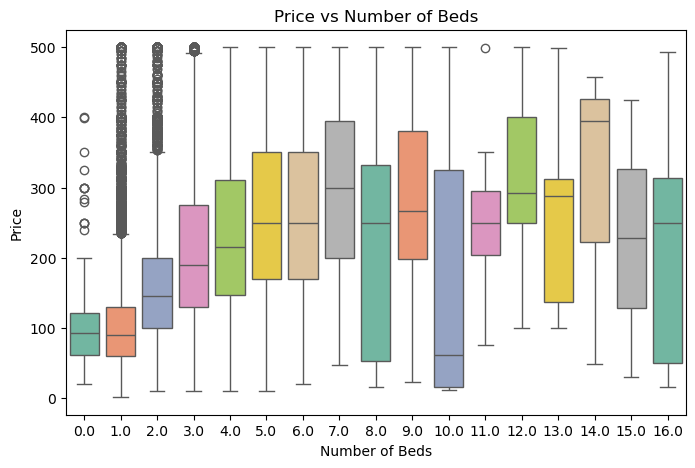

In [69]:
plt.figure(figsize=(8,5))
sns.boxplot(x='beds', y='price', data=df[df['price'] < 500], palette='Set2')

plt.title('Price vs Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Price')
plt.show()


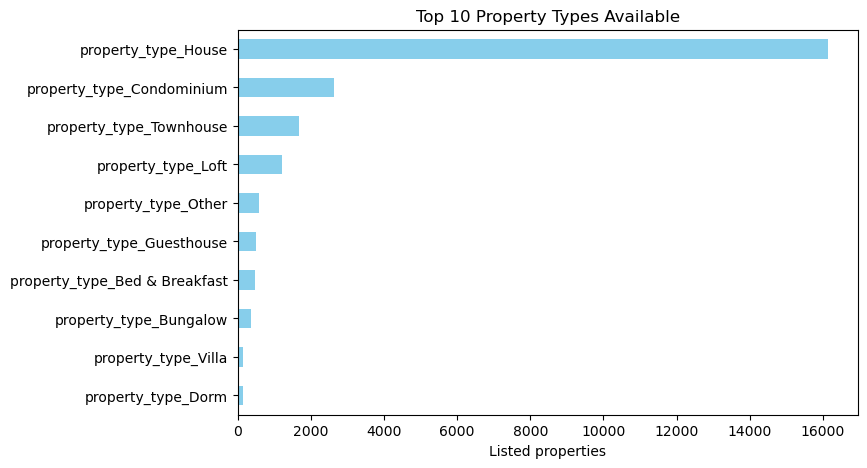

In [70]:
property_cols = [col for col in df.columns if col.startswith("property_type_")]

properties = df[property_cols].sum().sort_values(ascending=False).head(10)

properties.plot(kind='barh', color='skyblue', figsize=(8,5))
plt.title('Top 10 Property Types Available')
plt.xlabel('Listed properties')
plt.gca().invert_yaxis()
plt.show()


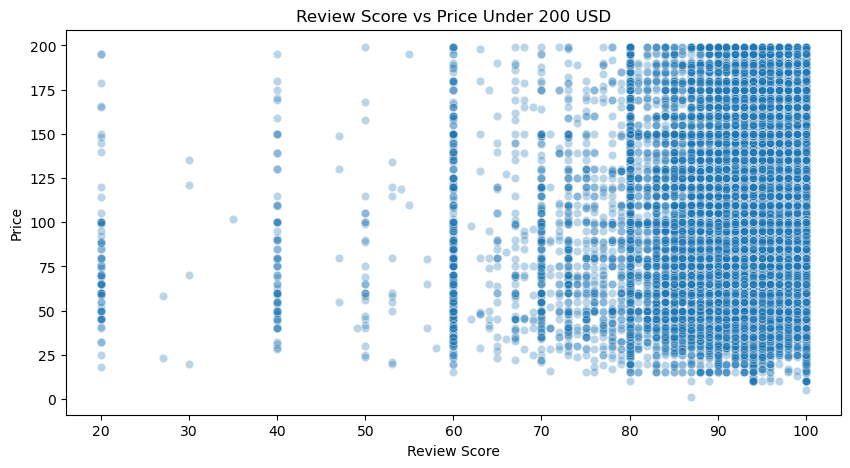

In [71]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df[df['price'] < 200], x='review_scores_rating', y='price', alpha=0.3)

plt.title('Review Score vs Price Under 200 USD')
plt.xlabel('Review Score')

plt.ylabel('Price')
plt.show()


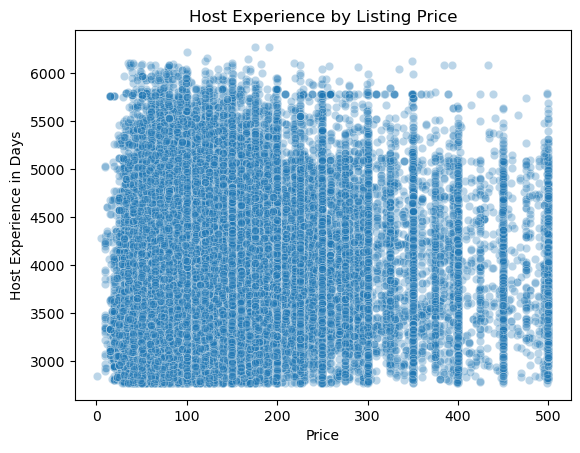

In [72]:
sns.scatterplot(x='price', y='host_experience_days', data=df[df['price'] < 500], alpha=0.3)
plt.title('Host Experience by Listing Price')

plt.ylabel('Host Experience in Days')

plt.xlabel('Price')
plt.show()


C:\Users\vdm\AppData\Local\Temp\ipykernel_5960\1656694856.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: 'Private room' if x[0] else ('Shared room' if x[1] else 'Entire home/apt'), axis=1)
C:\Users\vdm\AppData\Local\Temp\ipykernel_5960\1656694856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='room_type', y='price', data=df[df['price'] < 500], palette='pastel')


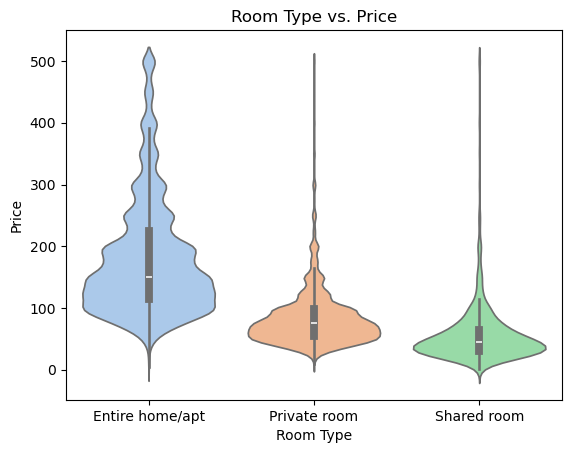

In [73]:
df['room_type'] = df[['room_type_Private room', 'room_type_Shared room']].apply(
    lambda x: 'Private room' if x[0] else ('Shared room' if x[1] else 'Entire home/apt'), axis=1)

sns.violinplot(x='room_type', y='price', data=df[df['price'] < 500], palette='pastel')

plt.title('Room Type vs. Price')

plt.xlabel('Room Type')
plt.ylabel('Price')

plt.show()
